# PROJECT TEAM ID - PTID-CDS-NOV-23-1700
# CAPSTONE PROJECT 1 - PRCP-1025 - FLIGHT PRICE PREDICTION


# 1. Problem Statement

* Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story.


* We might have often heard travelers saying that flight ticket prices are so unpredictable.

* That’s why we will try to use machine learning to solve this problem.

* This can help airlines by predicting what prices they can maintain.

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# 2. Import basic libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 3. Load Data


In [ ]:
# Import data

data=pd.read_csv("/content/Flight_Fare.csv")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 4. Domain Analysis


* Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.




* Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.

* Source: This column holds the name of the place from where the passenger’s journey will start.

* Destination: This column holds the name of the place to where passengers wanted to travel.

* Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

* Arrival_Time: Arrival time is when the passenger will reach his/her destination.

* Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.

* Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.

* Additional_Info: In this column, we will get information about food, kind of food, and other amenities.

* Price: Price of the flight for a complete journey including all the expenses before onboarding.

# 5. Basic Checks

In [ ]:
# To see number of rows and columns

data.shape

In [ ]:
# To see datas in first 5 rows

data.head()

In [ ]:
# To see datas in last 5 rows

data.tail()

In [ ]:
# To see the column names

data.columns

In [ ]:
# To see the datatypes of each columns

data.dtypes

In [ ]:
# To see the number of null values in each column along with memory usage and datatype

data.info()

In [ ]:
# To see statistical informations regarding the dataset

data.describe()

# 6. Exploratory Data Analysis (EDA)

## Univariate Analysis

### 1.AIRLINE

In [ ]:
plt.figure(figsize=(30,17))
sns.countplot(x="Airline",data=data)
plt.xlabel("Airline",fontsize=20)
plt.ylabel("count",fontsize=20)

### Insights:
From the countplot drawn here, we can see that Jet Airways is the costliest among all the flights

### 2. SOURCE

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Source",data=data)
plt.xlabel("Source",fontsize=20)
plt.ylabel("count",fontsize=20)

#### INSIGHTS:

Delhi has highest take off or originating point for all the flights followed by Kolkata and Banglore respectivel

### 3. DESTINATION

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Destination",data=data)
plt.xlabel("Destination",fontsize=20)
plt.ylabel("count",fontsize=20)

#### INSIGHTS:

Cochin has the highest landing or arrival of the flights from different places followed by Banglore and Delhi.

### 4. TOTAL STOPS

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops",data=data)
plt.xlabel("Total_Stops",fontsize=20)
plt.ylabel("count",fontsize=20)

#### INSIGHTS:

Most flights have single stop in between taking off and landing at the destination followed by non-stop.

### 5. ADDITIONAL INFO

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x="Additional_Info",data=data)
plt.xlabel("Additional_Info",fontsize=20)
plt.ylabel("count",fontsize=20)

#### INSIGHTS:

Most of the flights do not have any extra information

There are few flights with extra information of "in-flight meal not included" followed by "No Check-in baggage included"

### sweetviz can be used for univariate analysis.

In [ ]:
# Installing sweetviz

!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 71.6 MB/s eta 0:00:00


In [ ]:
# Importing sweetviz

import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html("my_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###  INSIGHTS:

* Majority of the flight prices are coming under 20,000

* The maximum flight price is 79,512 and minimum flight price is 1,759

* Most of the flights do not have any extra information

* There are few flights with extra information of "in-flight meal not included" followed by "No Check-in baggage included"

* About 53% of flights have single stop in between taking off and landing at the destination followed by non-stop.

* Cochin has the highest landing or arrival of the flights from different places followed by Banglore and Delhi.

* Kolkata has the least landing or arrival

* Delhi has highest take off or originating point for all the flights followed by Kolkata and Banglore.

* Chennai has the least take off as compared to all others.

* Jet Airways is the most choosen and costliest among all the flights.

* Go Air is the least choosen flight as compared to all others.

## Bi Variate analysis

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline",y="Price",data=data)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Source",y="Price",data=data)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Destination",y="Price",data=data)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Total_Stops",y="Price",data=data)

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x="Additional_Info",y="Price",data=data)

### INSIGHTS:

* Flight price is high for Jet Airways and low for Spicejet and Trujet

* Flight price from Delhi is high followed by Kolkata

* Flight price to New Delhi is high followed by Cochin

* Flight price is high if the total stop is equal to 4

* Regrading additional info , we can say that business class has got highest flight price.

* On the data 01/03/2019 , flight price is very high as compared to others.

# 7. Data Preprocessing

In [ ]:
# To see if there is any null values in the dataset

data.isnull().sum()

In [ ]:
# Since there are only two missing values which is relatively small compared to the dataset,we can drop it

data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
# Since the column "Additional_info" is not giving much valid information regarding the dataset , we
# will drop it

data.drop(['Additional_Info'],axis=1,inplace=True)

In [ ]:
data.head()

### Extracting date and month from Date_of_Journey column

#### Converting into Datetime datatype:

* We are going to extract the date and month from the date of the journey .

* For this, we require pandas to_datetime to convert the object data type to DateTime data type .

* .dt.day the method will extract only the day from the date.

* .dt.month the method will extract only the month of that date.

In [1]:
# Importing necessary libraries

from datetime import datetime, timedelta
import datetime as dt

#### DATE:

In [ ]:
# Creating another column named "journey_Date" which holds the extracted date from the "Date_of_Journey"
# column

data["journey_Date"]= pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day

#### MONTH:

In [ ]:
# Creating another column named "journey_month" which holds the extracted month  from the
# "Date_of_Journey" column

data["journey_month"]= pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [ ]:
# Since we have already extracted date and month, we can drop the original column "Date_of_Journey"

data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [ ]:
# Checking to see changes

data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Since we have extracted date and month from "Date_of_Journey",we can also extract hour and minute from the column "Dep_Time" as well as "Arrival_Time"

#### HOUR - "Dep_Time"

In [ ]:
# Creating another column named "Dep_hour" which holds the extracted hour from the "Dep_Time" column

data["Dep_hour"]= pd.to_datetime(data['Dep_Time']).dt.hour

#### MINUTE - "Dep_Time"

In [ ]:
# Creating another column named "Dep_min" which holds the extracted minute from the "Dep_Time" column

data["Dep_min"]= pd.to_datetime(data['Dep_Time']).dt.minute

In [ ]:
# Since we dont need the column "Dep_Time" anymore , we will drop it

data.drop(["Dep_Time"],axis=1,inplace=True)

#### HOUR-"Arrival_Time"

In [ ]:
# Creating another column named "Arrival_hour" which holds the extracted hour from the "Arrival_Time" column

data["Arrival_hour"]= pd.to_datetime(data['Arrival_Time']).dt.hour

#### MINUTE - "Arrival_Time"

In [ ]:
# Creating another column named "Arrival_min" which holds the extracted minute from the "Arrival_Time" column

data["Arrival_min"]= pd.to_datetime(data['Arrival_Time']).dt.minute

In [ ]:
# Since we dont need the column "Arrival_Time" , we will drop it

data.drop(["Arrival_Time"],axis=1,inplace=True)

In [ ]:
# Checking to see the changes

data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Extracting hours and minutes from column "Duration":

In [ ]:
duration=list(data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if "h" in duration[i]:
      duration[i]=duration[i].strip()+" 0m"
    else:
      duration[i]="0h "+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep="h")[0]))
  duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

* Now , we can add new columns "Duration_hours" and "Duration_mins" and remove the original column "Duration"

In [ ]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

data.drop(["Duration"],axis=1,inplace=True)

In [ ]:
# checking to see the changes

data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Outlier Handling :
We can check outliers in numerical columns by plotting a box plot

In [ ]:

# Assigning numerical column name to a variable called num_col

num_col=data.select_dtypes(include=['int64','int32']).columns
num_col

Index(['Price', 'journey_Date', 'journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

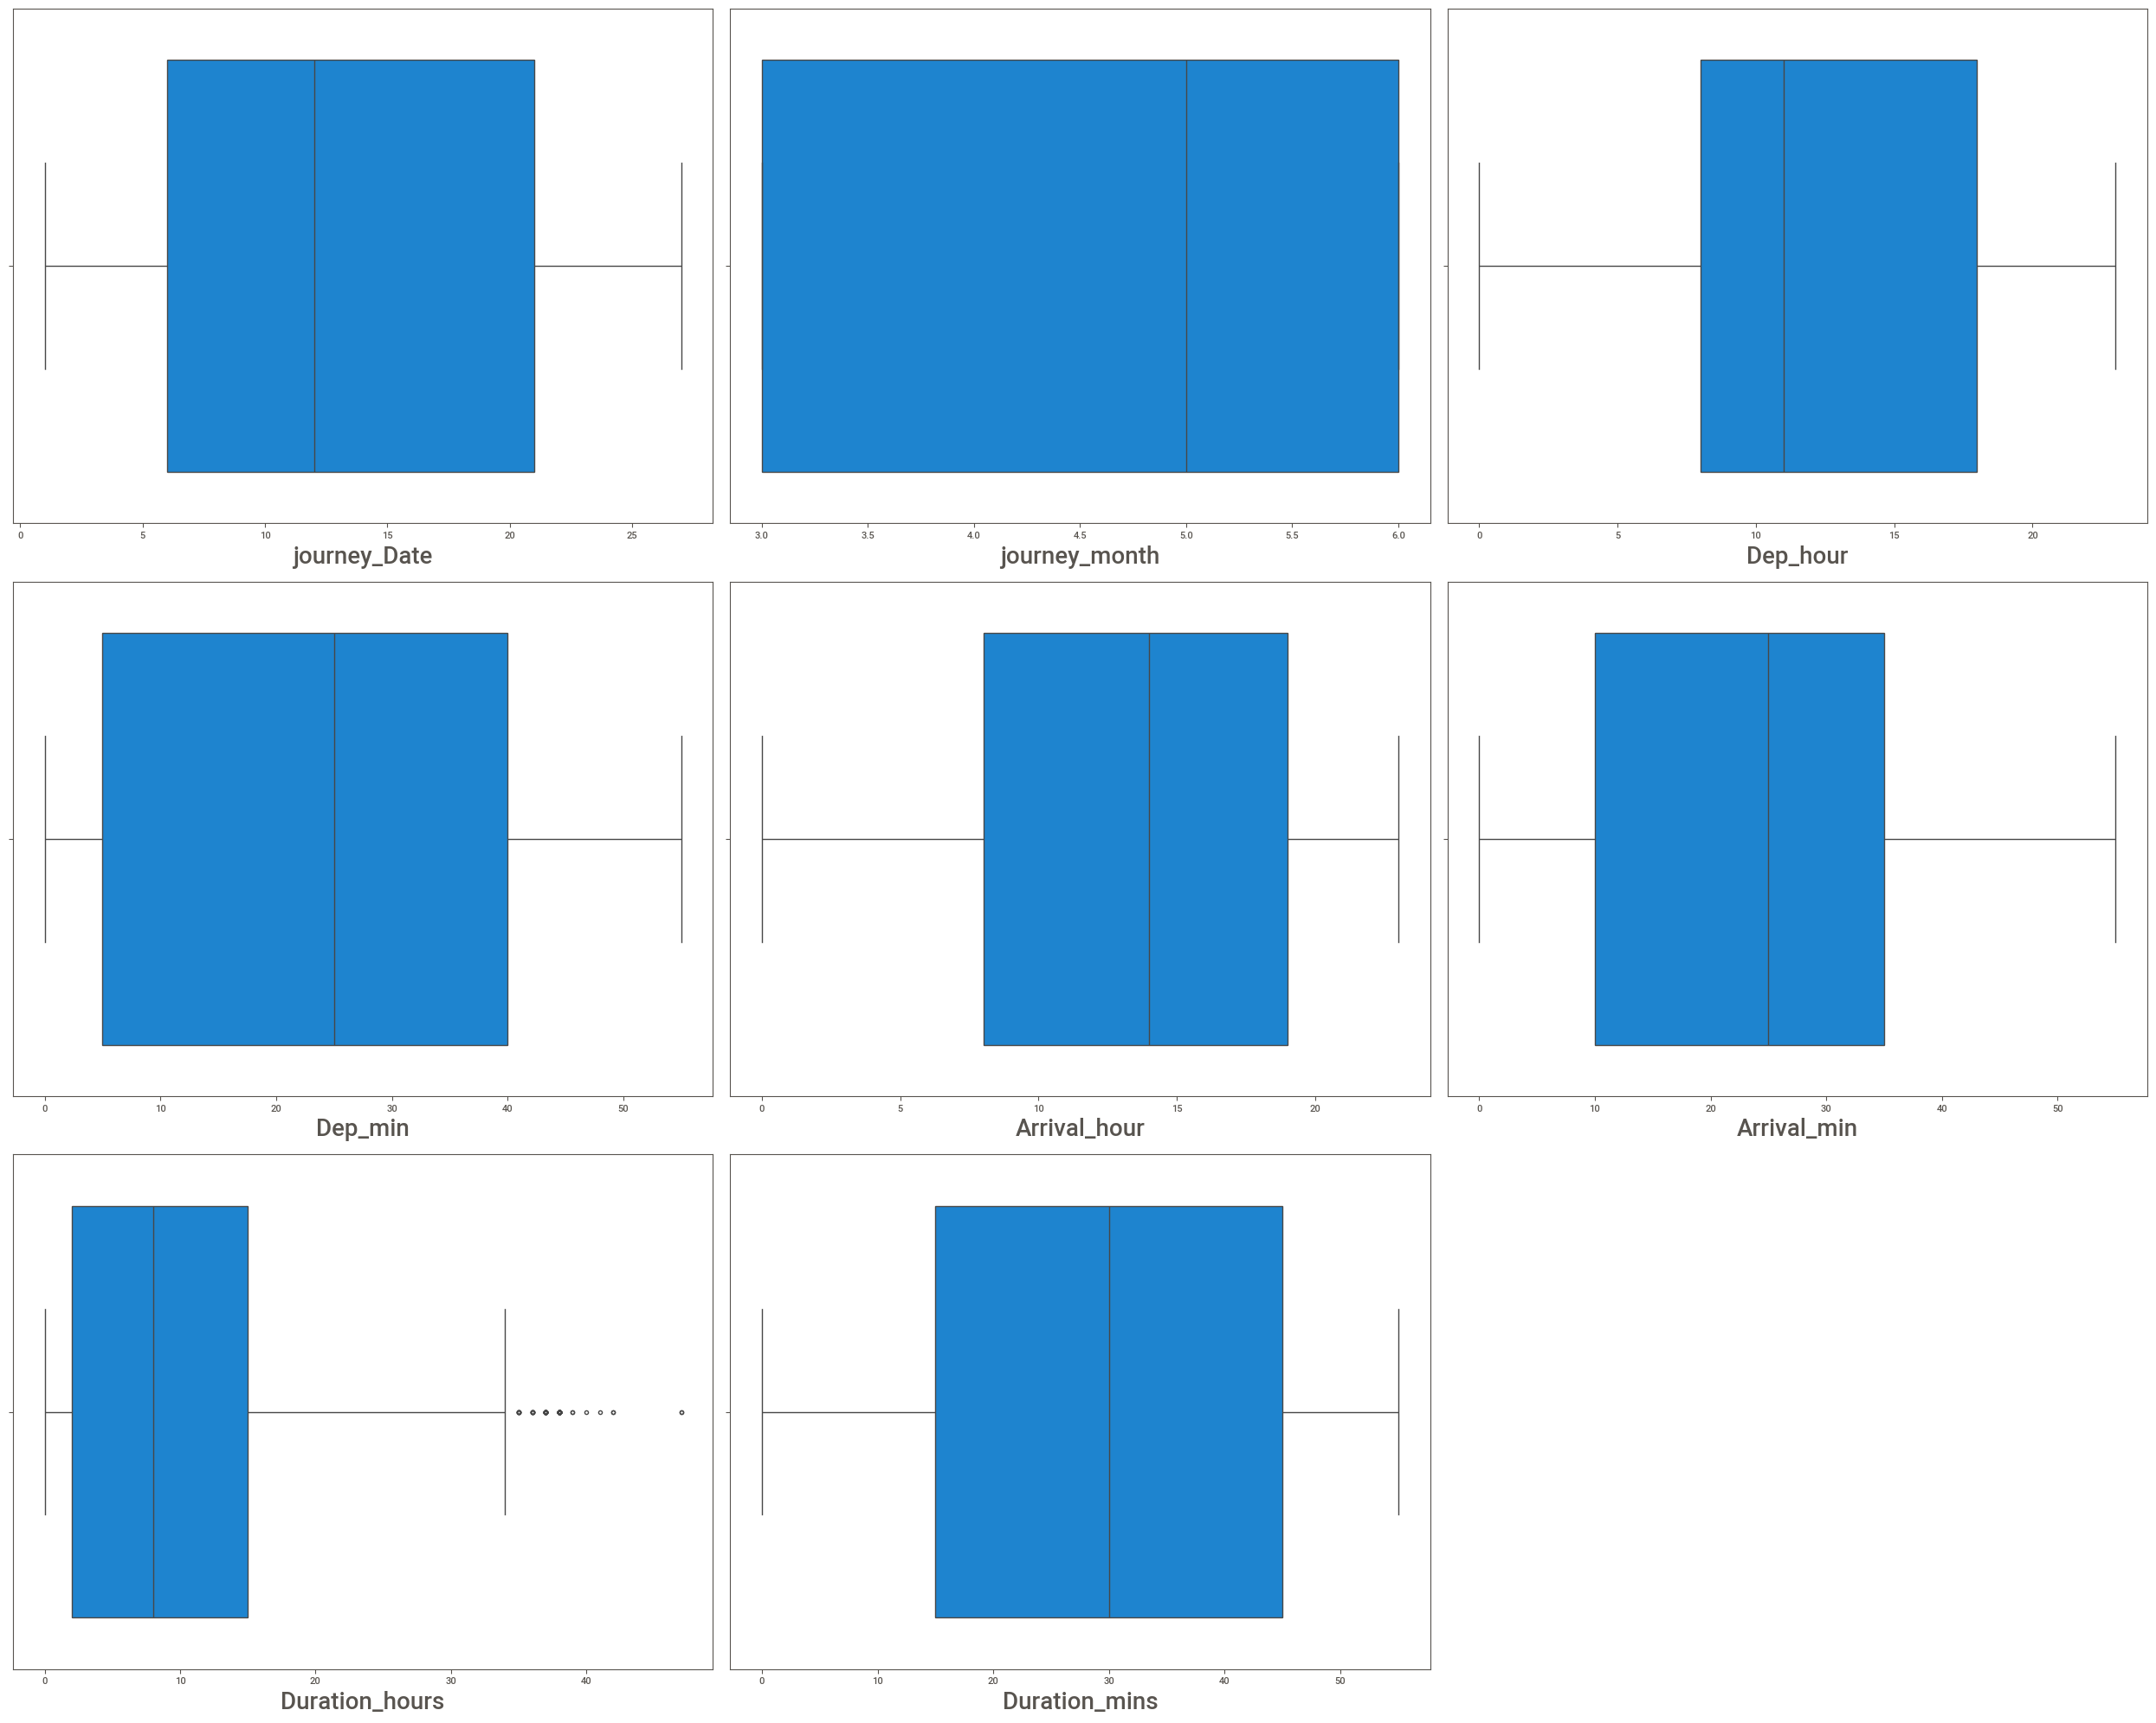

In [ ]:
# Finding the outliers excluding the target column

plt.figure(figsize=(25,20))
plotnum = 1
for column in num_col.drop("Price"):
  if plotnum<=9:
    ax=plt.subplot(3,3,plotnum)
    sns.boxplot(x=data[column])
    plt.xlabel(column, fontsize = 20)
  plotnum+=1
plt.tight_layout()

 * From the above box plots , we can understand that the column "Duration_hours" has outliers or extreme values.

* In order to handle outliers , first we need to check the distribution of that particular column.

* If the distribution is normal we will handle outliers by doing 3-Sigma rule, otherwise we will go for IQR method.

<Axes: xlabel='Duration_hours', ylabel='Count'>

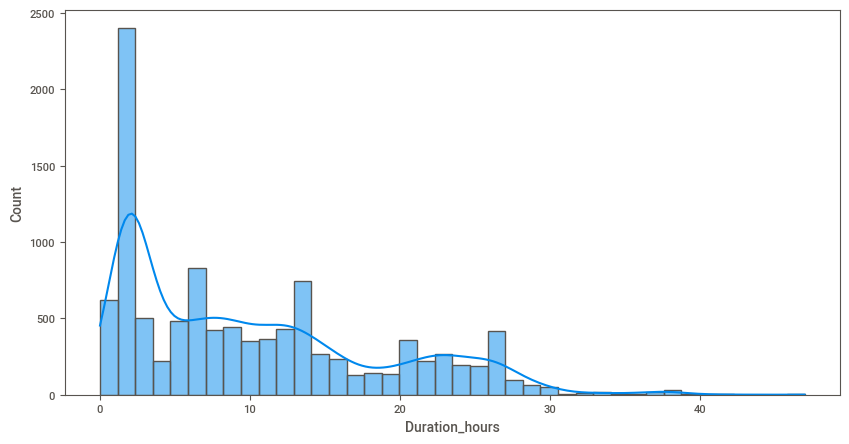

In [ ]:
# plotting a histplot in order to check the distribution of data in the column "Duration_hours"

plt.figure(figsize=(10,5))
sns.histplot(data=data,x='Duration_hours',kde=True)

In [ ]:
# Since the distribution is not normal we will handle outliers by using IQR method
# Finding lower and upper quartile

Q1=data['Duration_hours'].quantile(0.25)
print("lower quartile",Q1)
Q3=data['Duration_hours'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 2.0
upper quartile 15.0


In [ ]:
# Find IQR

IQR=Q3-Q1
IQR

13.0

In [ ]:
# Find Lower limit & upper limit

lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is -17.5
upper limit is 34.5


In [ ]:
# Find values above upper_limit

data.loc[data['Duration_hours']>upper_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
226,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2 stops,No info,18799,3,3,5,25,18,50,37,25
553,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,10598,9,3,5,0,19,15,38,15
919,Air India,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,3 stops,No info,10991,12,5,12,0,23,15,35,15
925,Jet Airways,Delhi,Cochin,DEL → DED → BOM → COK,2 stops,No info,19907,6,3,16,50,4,25,35,35
966,Air India,Delhi,Cochin,DEL → NAG → BOM → COK,2 stops,No info,10493,21,5,5,55,19,15,37,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,2 stops,No info,17135,1,3,8,50,23,55,39,5
10020,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,9653,9,5,5,0,19,15,38,15
10326,Air India,Banglore,New Delhi,BLR → CCU → GAU → DEL,2 stops,No info,11791,3,3,5,50,22,10,40,20
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,20694,6,3,19,10,18,50,47,40


In [ ]:
# Find values below lower limit

data.loc[data['Duration_hours']<lower_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins


In [ ]:
# find percentage of outliers

len(data.loc[data['Duration_hours']>upper_limit])/len(data)

0.006833286530000936

In [ ]:
# Since data distribution  is not normal we will replace outliers with median

data.loc[data['Duration_hours']>upper_limit,'Duration_hours']=data['Duration_hours'].median()

<Axes: xlabel='Duration_hours'>

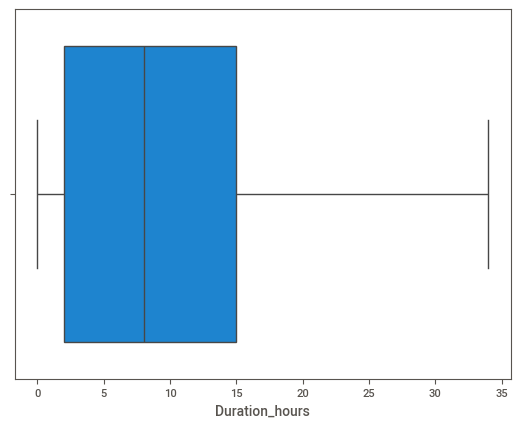

In [ ]:
# Checking to see changes

sns.boxplot(x=data.Duration_hours)

* So , we have successfully handled outliers and next we can move on to the process of encoding

### Converting categorical values to numerical values :

* Airline, Source, Destination, Route, Total_Stops are the categorical variables we have in our data.

#### 1. AIRLINE

In [ ]:
# Checking the unique values in the column "Airline"

data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
# Checking the count of each unique attributes

data.Airline.value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


* Since this is a nominal data and having 12 unique attributes , we cannot use one-hot encoding method because it will create more number of columns which will in turn leads to overfitting.

* In this case we can use frequency encoding for which we have to check the value counts for each category and assign larger number for column having larger value

In [ ]:
# Making a copy of data and store it in the variable data2.

data2=data.copy()

In [ ]:
# Encoding Airline by frequency encoding

data2.Airline=data2.Airline.map({'Trujet':0,'Vistara Premium economy':1,'Jet Airways Business':2,'Multiple carriers Premium economy':3,'GoAir':4,'Air Asia':5,'Vistara':6,'SpiceJet':7,'Multiple carriers':8,'Air India':9,'IndiGo':10,'Jet Airways':11})


#### 2. SOURCE

In [ ]:
# Checking the unique values in the column "Source"

data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
# Checking the count of each unique attributes

data.Source.value_counts()

,count
Source,
Delhi,4537
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


* Since this is also nominal data having more than 3 unique attributes , we can use one-hot encoding method

In [ ]:
# Encoding Source by one hot encoding

df2=pd.get_dummies(data2.Source,drop_first=True)
data2=pd.concat([data2,df2],axis=1)

In [ ]:
# Removing the original column "Source"

data2.drop(["Source"],axis=1,inplace=True)

#### 3.DESTINATION

In [ ]:
# Checking the unique values in the column "Destination"

data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
# Checking the count of each unique attributes

data.Destination.value_counts()

,count
Destination,
Cochin,4537
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


* Since this is also a nominal data having more than 3 unique attributes , we can use one-hot encoding method

In [ ]:
# Encoding Destination by one hot encoding

df3=pd.get_dummies(data2.Destination,drop_first=True)
data2=pd.concat([data2,df3],axis=1)

In [ ]:
# Removing the original column "Destination"

data2.drop(["Destination"],axis=1,inplace=True)


In [ ]:
# Since the column "Route" is related to number of stops , we will drop it

data2.drop(["Route"], axis = 1, inplace = True)

#### 4.TOTAL STOPS

In [ ]:
# Checking the unique values in the column "Total_Stops"

data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
# Checking the count of each unique attributes

data.Total_Stops.value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


* Since this is an ordinal data having more than 3 unique attributes we can use frequency encoding.

In [ ]:
# Encoding column "Total_Stops" using frequency encoding

data2.Total_Stops=data2.Total_Stops.map({'4 stops':0,'3 stops':1,'2 stops':2,'non-stop':3,'1 stop':4})

In [ ]:
df=data2
df.head()

,Airline,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Duration_mins,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,10,3.0,No info,3897,24,3,22,20,1,10,...,50,False,False,False,False,False,False,False,False,True
1,9,2.0,No info,7662,1,5,5,50,13,15,...,25,False,False,True,False,False,False,False,False,False
2,11,2.0,No info,13882,9,6,9,25,4,25,...,0,False,True,False,False,True,False,False,False,False
3,10,4.0,No info,6218,12,5,18,5,23,30,...,25,False,False,True,False,False,False,False,False,False
4,10,4.0,No info,13302,1,3,16,50,21,35,...,45,False,False,False,False,False,False,False,False,True


# 8. FEATURE SELECTION

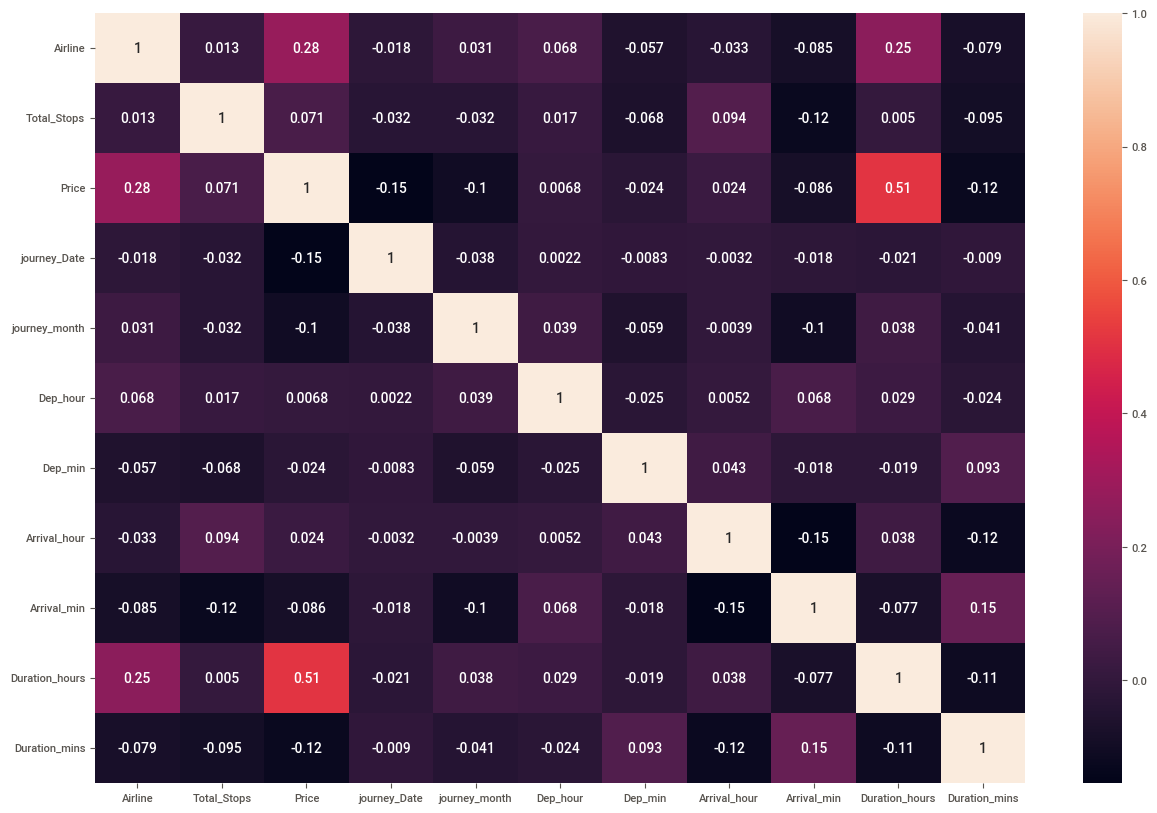

In [ ]:
# Plotting heatmap to find the correlation between independent to independent and independent to dependent variables

plt.figure(figsize=(15,10))
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(),annot = True)
plt.show()

In [ ]:
df["Price"]=df["Price"].astype(float)
df.pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_rows', None)
df

Output hidden; open in https://colab.research.google.com to view.

#### INSIGHTS:

* If two variables are highly correlated (e.g., correlation coefficient close to +1 or -1), it may be advisable to drop one of them to reduce multicollinearity.

* Here , we dont have such variables. So no need to drop any column

# 9. MODEL CREATION

* So far we have done domain analysis , exploratory data analysis , data pre-processing and feature selection.

* Now we can start building various models and see which model holds best accuracy

* We have the following machine learning models for regression:

    - Linear Regressor

    - K Nearest Neighbors Regressor

    - Decision Tree Regressor

    - Random Forest Regressor

    - Gradient Boosting Regressor

## LINEAR REGRESSION

In [ ]:
non_numeric_values = ['No info',"NaN"]
x_train.replace([non_numeric_values], np.nan, inplace=True)
y_train.replace([non_numeric_values], np.nan, inplace=True)
x_train

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Splitting data in to x and y
x_train.isnull().sum()
y_train.isnull().sum()
x=df.drop("Price",axis=1)
y=df["Price"]

In [ ]:
x_train.isnull().sum()


,0
Airline,0
Total_Stops,1
journey_Date,0
journey_month,0
Dep_hour,0
Dep_min,0
Arrival_hour,0
Arrival_min,0
Duration_hours,0
Duration_mins,0


In [ ]:
# Create training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012, 19)
(8012,)
(2671, 19)
(2671,)


In [ ]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression

# Initializing the model
LR=LinearRegression()

# Training the model
LR.fit(x_train,y_train)

# Predicting the model
y_pred=LR.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
# Finding mean square error , mean absolute error and root mean square error

mse=mean_squared_error(y_test,y_pred)
print(mse)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

import math
rmse=math.sqrt(mae)
print(rmse)

In [ ]:
# Finding r2 score

lr_score=r2_score(y_test,y_pred)
lr_score

In [ ]:
# Finding adjusted r2 score

adj_r2=1-(1-lr_score)*(2671-1)/(2671-19-1)
adj_r2

## KNN


In [ ]:
# import KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

# create empty list to store error values
error_rate=[]

for i in range(1,19):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

In [ ]:
# Plotting graph of error rate VS k value

plt.figure(figsize=(7,4))
plt.plot(range(1,19),error_rate,color="red",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [ ]:
# From the graph we can see that k=5 is giving less error. So wecan take 4 as the optimal value for k

from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [ ]:
# Finding MSE,MAE and RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print(mse)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

import math
rmse=math.sqrt(mae)
print(rmse)

In [ ]:
# Finding r2 score

knn_score=r2_score(y_test,y_pred)
knn_score

In [ ]:
# Finding adjusted r2 score

adj_r2=1-(1-lr_score)*(2671-1)/(2671-19-1)
adj_r2

## DECISION TREE

In [ ]:
# Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Initialising the model
dt=DecisionTreeRegressor()

# Training the model
dt.fit(x_train,y_train)

# Predicting the model
y_pred=dt.predict(x_test)

In [ ]:
# Finding MSE,MAE and RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print(mse)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

import math
rmse=math.sqrt(mae)
print(rmse)

In [ ]:
# Finding r2 score

dt_score=r2_score(y_test,y_pred)
dt_score

In [ ]:
# Finding adjusted r2 score

adj_r2=1-(1-dt_score)*(2671-1)/(2671-19-1)
adj_r2

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
# Finding MSE,MAE and RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print(mse)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

import math
rmse=math.sqrt(mae)
print(rmse)

In [ ]:
# Finding r2 score

rf_score=r2_score(y_test,y_pred)
rf_score

In [ ]:
# Finding adjusted r2 score

adj_r2=1-(1-rf_score)*(2671-1)/(2671-19-1)
adj_r2

### HYPER PARAMETER TUNING

In [ ]:
# import randomized search CV

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# It represents the number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=10)]

# auto will randomly select features and sqrt considers the square root of the total number of features at each split.
max_features = ['auto', 'sqrt']

# It determines the maximum depth of each decision tree in the random forest.
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

#It specifies the minimum number of samples required to split an internal node.
min_samples_split = [2,3,10,15]

#It tells the minimum number of samples that a leaf node should have.
min_samples_leaf = [1,2,5,10]

In [ ]:
# Dictionary for hyperparameters
random= {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
rf_random.fit(x_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf=RandomForestRegressor(n_estimators= 588,
min_samples_split= 3,
min_samples_leaf= 1,
max_features= 'sqrt',
max_depth= 20)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
# Finding MSE,MAE and RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print(mse)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

import math
rmse=math.sqrt(mae)
print(rmse)

In [ ]:
# Finding r2 score

rf_score=r2_score(y_test,y_pred)
rf_score

In [ ]:
# Finding adjusted r2 score

adj_r2=1-(1-rf_score)*(2671-1)/(2671-19-1)
adj_r2

## GRADIENT BOOSTING

In [ ]:
## importing gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialising the model
gbr=GradientBoostingRegressor(n_estimators=900)

# training the model
gbr.fit(x_train,y_train)

# predicting the model
y_pred=gbr.predict(x_test)

In [ ]:
# Finding MSE,MAE and RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print(mse)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

import math
rmse=math.sqrt(mae)
print(rmse)

In [ ]:
# Finding r2 score

gbr_score=r2_score(y_test,y_pred)
gbr_score

In [ ]:
# Finding adjusted r2 score

adj_r2=1-(1-gbr_score)*(2671-1)/(2671-19-1)
adj_r2

### HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param= {
    'n_estimators': [100, 200, 300,500],
    'learning_rate': [0.01, 0.1, 0.2 , 0.001],
    'max_depth': [3, 4, 5,7,9],
    'min_samples_split': [2, 5, 10,12],
    'min_samples_leaf': [1, 2, 5,7],
    'subsample': [0.7,0.8, 0.9, 1.0]
}


In [ ]:
random=RandomizedSearchCV(estimator=gbr,param_distributions=param,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
random.fit(x_train, y_train)

In [ ]:
random.best_params_

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators= 300,
                                         min_samples_split= 10,
                                         min_samples_leaf=4,
                                         subsample= 1.0,
                                         learning_rate= 0.1,
                                         max_depth= 5)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [ ]:
# Finding MSE,MAE and RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print(mse)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

import math
rmse=math.sqrt(mae)
print(rmse)

In [ ]:
# Finding r2 score

gbr_score=r2_score(y_test,y_pred)
gbr_score

In [ ]:
# Finding adjusted r2 score

adj_r2=1-(1-gbr_score)*(2671-1)/(2671-19-1)
adj_r2

# 10. Model Comparison Report

## Comparison of the Best Models:

In [ ]:
scores = [lr_score,knn_score,dt_score,rf_score,gbr_score]
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

### The performance percentage of each models has been stated below:

* LinearRegressor : 0.43%

* KNeighborsRegressor : 0.59%

* DecisionTreeRegressor : 0.69%

* RandomForestRegressor : 0.81%

* GradientBoostingRegressor : 0.84%

In [ ]:
# graphical representation of model performance

plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)

# 11. Conclusion

### 1. Introduction:

 * This report presents the findings and evaluation of machine learning models applied to predict flight prices.

 * The primary objective was to develop accurate models that can assist in predicting flight prices based on various features     such as departure city, destination, airline, and departure time.

### 2. Data Overview:


* The dataset comprised information regarding airline, source,destination,date of journey , total stops etc.Preprocessing steps   includes handling missing values, encoding categorical variables, and handling outliers.

### 3. Model Selection:

* We experimented with multiple regression algorithms, including Linear Regression, KNN,Random Forest, and Gradient Boosting to   identify the most suitable model for predicting flight prices.

### 4. Evaluation Metrics:

* The performance of the models was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) metrics. These   metrics provide a clear understanding of the models' accuracy and ability to generalize to unseen data.

### 5. Model Performance Summary:

* The Gradient Boosting model demonstrated the highest accuracy in predicting flight prices, outperforming other models
  The random forest model also plays an important role for predicting flight fare which has got 0.81 % accuracy


# 12. Challenges faced:

The challenges that we faced during flight fare prediction using machine learning are as follows:

### 1. Conversion of date and duration:

   - Extracting day and month from date of journey column was a tough task and challenging since the model finds it difficult
     to process thhe date format directly.

   - Converting these into a format that the model can understand can be messy and require careful preprocessing.
    
   - At the same time , extracting hours and minutes from the duration column was a difficult task and it was solved by using        some functions in pandas and also using some simple logic.


###  2. Feature Correlation:

  - When dealing with a large number of columns or features, finding meaningful correlations between them can be challenging.

  - Correlation analysis helps identify which features are strongly related to the target variable (flight fare in this case)
    and which are not.

  - However, for a large number of columns, this process can become complex and time-consuming.

###  3. Hyperparameter Tuning:

  - Hyperparameter tuning involves finding the best set of hyperparameters for a machine learning model to achieve optimal           performance.
  
  - This process often requires multiple iterations of training and evaluating the model with different hyperparameter               configurations.
  
  - It can be time-consuming because it involves a search in a high-dimensional space of hyperparameters, and each iteration         requires training the model, which can be computationally expensive
  
  - We used hyper parameter tuning in random forest and gradient boosting which took much time to run the code for training and
    it is solved by making some small changes in the parameters
